# Classification and prediction of PolitiFact Statements

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import precision_score, accuracy_score, roc_curve, confusion_matrix
from sklearn import preprocessing
from sklearn.utils import shuffle

import itertools
from sklearn import metrics
import seaborn as sns

%matplotlib inline
sns.set(style='whitegrid', palette='muted')

In [10]:
from data_util import get_fake_or_real_news, get_politifact, get_fact_fake

# x_train, x_test, y_train, y_test, word_index, labels, num_classes, X, y = get_fake_or_real_news()
# x_train, x_test, y_train, y_test, word_index, labels, num_classes, X, y = get_politifact()
# x_train, x_test, y_train, y_test, word_index, labels, num_classes, X, y = get_fact_fake()


def to_label(cat):
    return categories[cat]
##### RUMER TWITTER
# categories = {0:'true', 1: 'false'}
# data_train = pd.read_csv('data/RumerTwitter.csv', sep='\t')
# data_train['label'] = data_train['label'].apply(to_label)
# X = data_train['text'].values
# y = data_train['label'].values
# labels = data_train['label'].unique()
# print(data_train['label'].value_counts())
# print(len(data_train['event_id'].unique()))
# print(data_train['event_id'].unique())
# data_train.tail()
#####

##### FakeNewsNet #####################################
# def add_text(row):
#     return row['title_tokens'] + ' ' + row['text_tokens'] 
    
    
# categories = {'FakeNewsContent':'False', 'RealNewsContent':'True'}
# data_train = pd.read_csv('data/fakeNewsNet.csv', sep='\t')
# data_train.dropna(how='any', inplace=True) 
# print(data_train['collected_by'].unique())
# print(data_train['label'].unique())
# print(data_train.isnull().values.any())
# data_train['label'] = data_train['label'].apply(to_label)
# data_train['document'] = data_train.apply(add_text, axis=1)
# X =  data_train['document'].values
# y = data_train['label'].values
# labels = data_train['label'].unique()
# print(data_train['label'].value_counts())
#################################################

##### Unreliable News Data ##################################
data_train = pd.read_csv('data/newsfiles/fulltrain.csv', names=['label', 'text'])
categories = {1:"Satire",2:"Hoax",
              3:"Propaganda",4:"Trusted"}

data_train['label'] = data_train['label'].apply(to_label)
X =  data_train['text'].values
y = data_train['label'].values
labels = data_train['label'].unique()
print(data_train['label'].value_counts())
############################

# print(X[1] ,y[1])
print()
data_train.tail()


Propaganda    17870
Satire        14047
Trusted        9995
Hoax           6942
Name: label, dtype: int64



,label,text
48849,Trusted,The ruling Kuomintang (KMT) has claimed owners...
48850,Trusted,The Taipei city government has encouraged the ...
48851,Trusted,President Ma Ying-jeou said Friday that a park...
48852,Trusted,The families of the four people who were kille...
48853,Trusted,The Ministry of Finance will make public on Sa...


In [11]:
##### SNOPES
# def label(row):
# #     print(row)
#     if str(row).lower() in ['true', 'mixture', 'mixture', 'mtrue']:
#         return 'true'
#     else:
#         return 'false'
        
# data_train = pd.read_csv('data/snopes.tsv', sep='\t')

# data_train['label'] = data_train['lable']

# print(data_train['label'].unique())
# X = data_train['claim'].values.astype('U')
# y = data_train['label'].values
# #########################################

# data_train = pd.read_csv('data/snopes.csv')
# data_train = pd.DataFrame({'claim' : np.append(X, data_train['claim'].values.astype('U')), 
#                            'label' : np.append(y, data_train['claim_label'].values)})

# # data_train.dropna(how='any', inplace=True) 
# print(data_train['claim'].isnull().values.any())
# data_train = data_train.drop_duplicates(['claim'], keep='last')
# data_train['label'] = data_train['label'].apply(label)
# labels = data_train['label'].unique()
# print(data_train['label'].value_counts())
# data_train.reset_index(drop=True, inplace=True)
# X = data_train['claim'].values.astype('U')
# y = data_train['label'].values
# data_train.to_csv('data/snopes_processed.tsv', sep='\t')
# data_train.tail(100)


In [12]:
%%time


TF_IDF = True
classes = labels

if TF_IDF:
#     vect = TfidfVectorizer(norm='l2', lowercase=True, stop_words='english')
    vect = TfidfVectorizer(norm='l2', ngram_range=(1, 2), lowercase=True, stop_words='english')
#     vect = CountVectorizer(min_df=2,ngram_range=(1, 2)) # Count Vectorizer
    X = vect.fit_transform(X)

#     svd = TruncatedSVD(n_components=120)
#     X = svd.fit_transform(X)
    print('X.shape', X.shape)    
    print(X[1])
else:
    X = data_train['glove'].values
    X = np.array(list(X), dtype=np.float)
#     X = preprocessing.normalize(X)
    print('X.shape', X.shape)

X.shape (48854, 7388647)
  (0, 326641)	0.036607688245
  (0, 2491292)	0.104417533529
  (0, 4456311)	0.0389569461117
  (0, 5734826)	0.017972309003
  (0, 1344014)	0.0313887641587
  (0, 4482268)	0.0439290980124
  (0, 7318933)	0.0633074256704
  (0, 3056407)	0.0823068460705
  (0, 5916472)	0.0907734382803
  (0, 6135065)	0.104533608098
  (0, 6719636)	0.0366530184964
  (0, 1730422)	0.0777167337457
  (0, 6314678)	0.0942126446516
  (0, 6280237)	0.0431510598897
  (0, 3655542)	0.0474461834664
  (0, 7973)	0.0329028643557
  (0, 4217007)	0.0340594726862
  (0, 5940379)	0.0689935132812
  (0, 5849505)	0.143359796331
  (0, 5054847)	0.0810016486168
  (0, 2294420)	0.126780336686
  (0, 6406403)	0.0450451642357
  (0, 1818864)	0.0507194180492
  (0, 855649)	0.0658562889161
  (0, 1209392)	0.0474304693448
  :	:
  (0, 7057714)	0.123924825403
  (0, 3085509)	0.128621702768
  (0, 4483215)	0.128621702768
  (0, 3130964)	0.123924825403
  (0, 5850144)	0.112562972988
  (0, 2294962)	0.123924825403
  (0, 6719327)	0.12862170

In [13]:
# from os.path import expanduser, exists

# embeddings_index = {}
# KERAS_DATASETS_DIR = expanduser('~/.keras/datasets/')
# GLOVE_FILE = 'glove.840B.300d.txt'

# print("Processing", GLOVE_FILE)

# embeddings_index = {}
# with open(KERAS_DATASETS_DIR + GLOVE_FILE, encoding='utf-8') as f:
#     for line in f:
#         values = line.split(' ')
#         word = values[0]
#         embedding = np.asarray(values[1:], dtype='float32')
#         embeddings_index[word] = embedding

# print('Word embeddings: %d' % len(embeddings_index))

# EMBEDDING_DIM = 300
# vect = TfidfVectorizer(norm='l2')
# vect.fit_transform(X)
# print(len(vect.vocabulary_))

# def sent2vec(s):
#     words = str(s).lower().split(' ')
#     M = []
#     for w in words:
#         try:
#             M.append(embeddings_index[w])
#         except:
#             continue
#     M = np.array(M)
#     v = M.sum(axis=0)
#     if type(v) != np.ndarray:
#         return np.random.uniform(EMBEDDING_DIM)
    
#     return np.mean(M, axis=0)
# #     return v / np.sqrt((v ** 2).sum())

# data_train['glove'] = data_train['TokenizedContent'].apply(sent2vec)
# data_train.to_csv('data/hansard_processed_all.csv')
# data_train.tail()

In [14]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

LogisticRegression LogisticRegression(C=15, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
             precision    recall  f1-score   support

     Satire      0.980     0.933     0.956      6942
       Hoax      0.963     0.975     0.969     17870
 Propaganda      0.919     0.979     0.948     14047
    Trusted      0.977     0.900     0.937      9995

avg / total      0.956     0.955     0.955     48854

metric accuracy Score 0.954681295288
Confusion matrix, without normalization
[[ 6476   213   217    36]
 [   74 17424   322    50]
 [   27   146 13749   125]
 [   32   305   667  8991]]


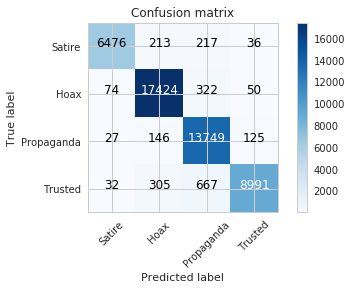

----------------------------------------------------------------------------------------------------
PassiveAggressiveClassifier PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
              fit_intercept=True, loss='hinge', max_iter=50, n_iter=None,
              n_jobs=1, random_state=None, shuffle=True, tol=None,
              verbose=0, warm_start=False)
             precision    recall  f1-score   support

     Satire      0.979     0.960     0.969      6942
       Hoax      0.972     0.981     0.977     17870
 Propaganda      0.951     0.976     0.964     14047
    Trusted      0.973     0.935     0.954      9995

avg / total      0.967     0.967     0.967     48854

metric accuracy Score 0.967147009457
Confusion matrix, without normalization
[[ 6663   155    91    33]
 [   81 17528   201    60]
 [   35   136 13714   162]
 [   30   208   413  9344]]


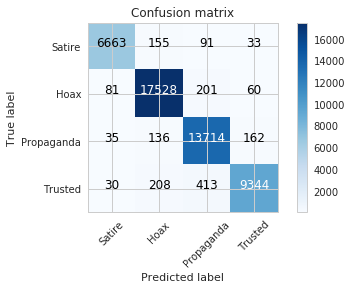

----------------------------------------------------------------------------------------------------
SVC SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
             precision    recall  f1-score   support

     Satire      0.984     0.941     0.962      6942
       Hoax      0.964     0.987     0.975     17870
 Propaganda      0.943     0.977     0.960     14047
    Trusted      0.978     0.916     0.946      9995

avg / total      0.964     0.963     0.963     48854

metric accuracy Score 0.9629917714
Confusion matrix, without normalization
[[ 6530   216   166    30]
 [   65 17632   120    53]
 [   20   176 13725   126]
 [   22   265   549  9159]]


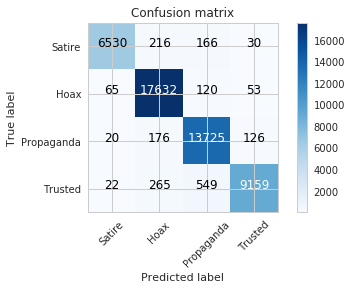

----------------------------------------------------------------------------------------------------
CPU times: user 2h 56s, sys: 40.9 s, total: 2h 1min 37s
Wall time: 1h 51min 23s


In [15]:
%%time

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

# classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier, BernoulliRBM
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.decomposition import TruncatedSVD
from xgboost import XGBClassifier as XGBoostClassifier
from sklearn.linear_model import PassiveAggressiveClassifier


skf = StratifiedKFold(n_splits=2, random_state=42, shuffle=True)
# print(skf)  
score = []

# print(X[9])

classifiers = {
#     'KNeighbors' : KNeighborsClassifier(n_neighbors=3),               
#     'Centroid': NearestCentroid(),               
#     'MultinomialNB': MultinomialNB(), 
#     'XGBoostClassifier' : XGBoostClassifier(seed=42),
#     'BernoulliNB' : BernoulliNB(),
    'LogisticRegression' : LogisticRegression(C=15, random_state=42),    
    'PassiveAggressiveClassifier' : PassiveAggressiveClassifier(max_iter=50),
#     'DecisionTreeClassifier' : DecisionTreeClassifier(max_depth=10, random_state=42),               
#     'SGDClassifier' : SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, random_state=42, max_iter=1000 ),               
#     'MLPClassifier' : MLPClassifier(hidden_layer_sizes=(30,30,30)), 
#     'AdaBoostClassifier' : AdaBoostClassifier(n_estimators=100),               
#     'RandomForestClassifier' : RandomForestClassifier(max_depth=20, random_state=42),             
    'SVC' : SVC(kernel='linear', C= 1000)
}

for name, classifier in classifiers.items():
    print(name, classifier)
#     scores = cross_val_score(classifier, X, y, cv=skf)
    predicted = cross_val_predict(classifier, X, y, cv=skf)
    
    print(metrics.classification_report(y, predicted, 
                                        target_names=classes, digits=3))
    print('metric accuracy Score' , metrics.accuracy_score(y, predicted) )
#     print("%s Accuracy: %0.3f (+/- %0.3f)" % (name, scores.mean(), scores.std() * 2))

    CM = confusion_matrix(y_pred=predicted, y_true=y) 
    #     Plot normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(CM, classes=classes, title='Confusion matrix')
    plt.show()
    print('-' * 100)

# Voting classifiers

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.svm import SVC
from itertools import product
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print('X_train.shape', X_train.shape, 'y_train.shape', y_train.shape)
print('X_test.shape', X_test.shape, 'y_test.shape', y_test.shape)

LogisticRegression = LogisticRegression(C=15, random_state=42) 
KNeighborsClassifier = KNeighborsClassifier(n_neighbors=3)
# PassiveAggressiveClassifier = SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, random_state=42, max_iter=1000 )
SVC = SVC(kernel='linear', probability=True)

eclf = VotingClassifier(estimators=[('LR', LogisticRegression), 
#                                     ('PAC', PassiveAggressiveClassifier),
                                    ('SVC', SVC)
#                                     ('KNN', KNeighborsClassifier)
                                   ],
                        voting='soft', weights=[2, 2])

print('Start fitting')

LogisticRegression.fit(X_train, y_train)
# PassiveAggressiveClassifier.fit(X_train, y_train)
SVC.fit(X_train, y_train)
KNeighborsClassifier.fit(X_train, y_train)
eclf.fit(X_train, y_train)

predicted = eclf.predict(X_test)

print('finished fitting')

score = metrics.accuracy_score(y_test, predicted)
print("accuracy:   %0.3f" % score)
print(metrics.classification_report(y_test, predicted, 
                                    target_names=classes, digits=3))
 
CM = confusion_matrix(y_pred=predicted, y_true=y_test) 
#     Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(CM, classes=classes, title='Confusion matrix')
plt.show()
print('-' * 100)

# get informative features for classification

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier

# X = data_train['TokenizedContent'].values
# print(len(X))
# y = data_train['target']
# y = pd.get_dummies(y).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print('X_train.shape', X_train.shape, 'y_train.shape', y_train.shape)
print('X_test.shape', X_test.shape, 'y_test.shape', y_test.shape)
# print(y)


# classifier = PassiveAggressiveClassifier(max_iter=50)
classifier = LogisticRegression(C=15, random_state=42)
# classifier = SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, random_state=42, max_iter=1000 )
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)

score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
print(metrics.classification_report(y_test, pred, 
                                    target_names=classes, digits=3))
 
CM = confusion_matrix(y_pred=pred, y_true=y_test) 
#     Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(CM, classes=classes, title='Confusion matrix')
plt.show()
print('-' * 100)
   
def most_informative_feature_for_binary_classification(vectorizer, classifier, n=100):
    """
    See: https://stackoverflow.com/a/26980472
    
    Identify most important features if given a vectorizer and binary classifier. Set n to the number
    of weighted features you would like to show. (Note: current implementation merely prints and does not 
    return top classes.)
    """

    class_labels = classifier.classes_
    feature_names = vectorizer.get_feature_names()
    topn_class1 = sorted(zip(classifier.coef_[0], feature_names))[:n]
    topn_class2 = sorted(zip(classifier.coef_[0], feature_names))[-n:]

    for coef, feat in topn_class1:
        print(class_labels[0], coef, feat)

    print()

    for coef, feat in reversed(topn_class2):
        print(class_labels[1], coef, feat)


most_informative_feature_for_binary_classification(vect, classifier, n=30)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y,
                                                    random_state=42)

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(SVC(), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Topic Analysis

In [ ]:
from __future__ import print_function
from time import time

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.datasets import fetch_20newsgroups

n_samples = 2000
n_features = 1000
n_components = 10
n_top_words = 20


def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()


# Load the 20 newsgroups dataset and vectorize it. We use a few heuristics
# to filter out useless terms early on: the posts are stripped of headers,
# footers and quoted replies, and common English words, words occurring in
# only one document or in at least 95% of the documents are removed.

print("Loading dataset...")
t0 = time()
# dataset = fetch_20newsgroups(shuffle=True, random_state=1,
#                              remove=('headers', 'footers', 'quotes'))
# data_samples = dataset.data[:n_samples]
data_samples = X
print("done in %0.3fs." % (time() - t0))

# Use tf-idf features for NMF.
print("Extracting tf-idf features for NMF...")
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2,
                                   max_features=n_features,
                                   stop_words='english')
t0 = time()
tfidf = tfidf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))

# Use tf (raw term count) features for LDA.
print("Extracting tf features for LDA...")
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,
                                max_features=n_features,
                                stop_words='english')
t0 = time()
tf = tf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))
print()

# Fit the NMF model
print("Fitting the NMF model (Frobenius norm) with tf-idf features, "
      "n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
t0 = time()
nmf = NMF(n_components=n_components, random_state=1,
          alpha=.1, l1_ratio=.5).fit(tfidf)
print("done in %0.3fs." % (time() - t0))

print("\nTopics in NMF model (Frobenius norm):")
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
print_top_words(nmf, tfidf_feature_names, n_top_words)

# Fit the NMF model
print("Fitting the NMF model (generalized Kullback-Leibler divergence) with "
      "tf-idf features, n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
t0 = time()
nmf = NMF(n_components=n_components, random_state=1,
          beta_loss='kullback-leibler', solver='mu', max_iter=1000, alpha=.1,
          l1_ratio=.5).fit(tfidf)
print("done in %0.3fs." % (time() - t0))

print("\nTopics in NMF model (generalized Kullback-Leibler divergence):")
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
print_top_words(nmf, tfidf_feature_names, n_top_words)

print("Fitting LDA models with tf features, "
      "n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
lda = LatentDirichletAllocation(n_components=n_components, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)
t0 = time()
lda.fit(tf)
print("done in %0.3fs." % (time() - t0))

print("\nTopics in LDA model:")
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)